In [56]:
import os 

TITANIC_PATH = os.path.join("..", "datasets", "titanic")

import pandas as pd

def load_titanic_data(filename, titanic_path = TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [33]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [29]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [3]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, no need to try to
# understand every line.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
import numpy as np

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out


In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin): 
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names]
    
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

num_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
    ("imputer", Imputer(strategy = 'median')) # fills missing data with median value
])

In [15]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [8]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        self.most_frequent = pd.Series([X[c].value_counts().index[0] for c in X],
                                       index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent)

cat_pipeline = Pipeline([
    ('select_cat', DataFrameSelector(["Pclass", "Sex", "Embarked"])),
    ('imputer', MostFrequentImputer()),
    ("cat_encoder", CategoricalEncoder(encoding="onehot-dense"))
])

cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [36]:
from sklearn.pipeline import FeatureUnion

preprocess_pipeline = FeatureUnion([
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [15]:
y_train = train_data["Survived"]

In [38]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
X_test = preprocess_pipeline.transform(train_data)
y_pred = svm_clf.predict(X_test)

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_clf, X_train, y_train, cv = 10)
scores.mean()

0.7365250822835092

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

scores_rf = cross_val_score(rf_clf, X_train, y_train, cv = 10)
scores_rf

array([0.75555556, 0.77777778, 0.78651685, 0.83146067, 0.87640449,
       0.80898876, 0.80898876, 0.78651685, 0.7752809 , 0.875     ])

In [43]:
scores_rf.mean()

0.808249063670412

In [90]:
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
    ("imputer", Imputer(strategy = 'median')), # fills missing data with median value
    ("std_caler", StandardScaler()),
])


preprocess_pipeline = FeatureUnion([
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

X_train = preprocess_pipeline.fit_transform(train_data)

In [105]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

scores_rf = cross_val_score(rf_clf, X_train, y_train, cv = 10)
scores_rf

array([0.75555556, 0.77777778, 0.74157303, 0.83146067, 0.86516854,
       0.82022472, 0.80898876, 0.78651685, 0.79775281, 0.84090909])

In [106]:
scores_rf.mean()

0.8025927817500852

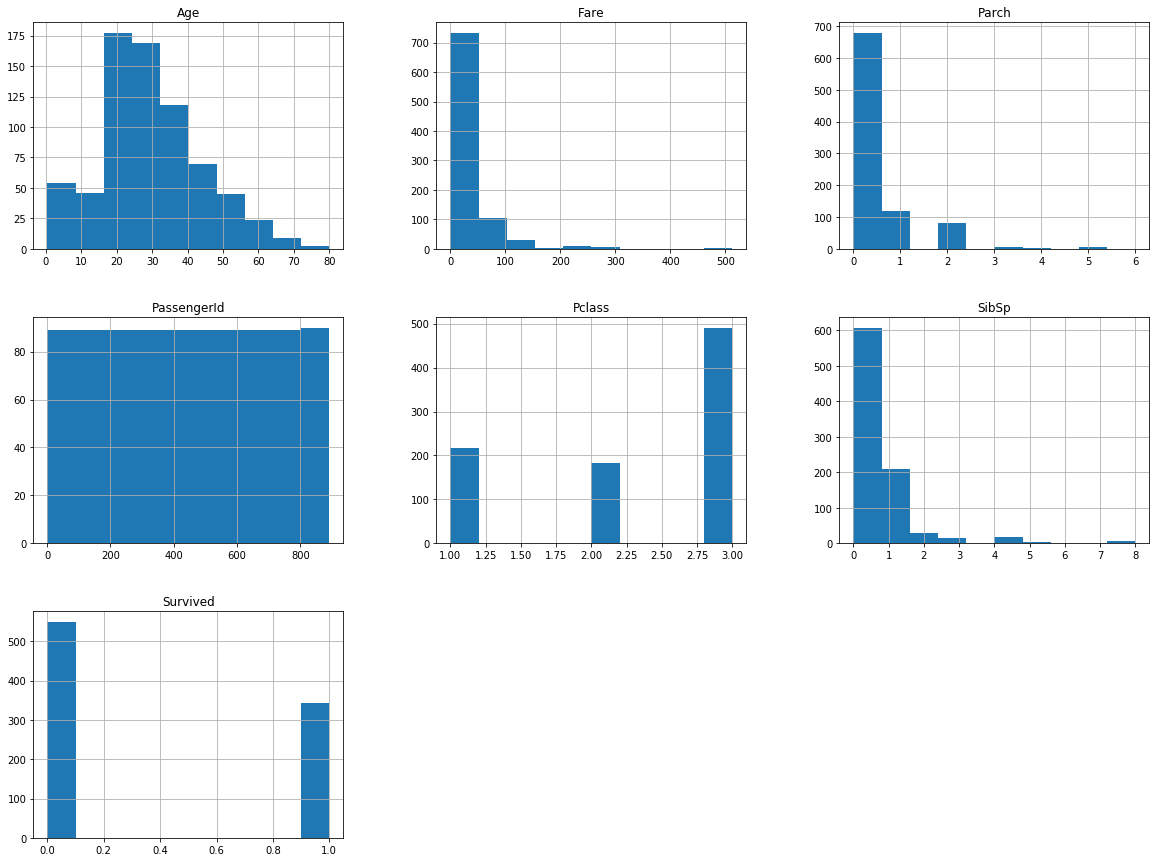

In [114]:
import matplotlib.pyplot as plt

train_data.hist(figsize = (20, 15))
plt.show()

In [116]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [120]:
train_data["NameLength"] = train_data["Name"].map(len)

In [131]:
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare", "NameLength"])),
    ("imputer", Imputer(strategy = 'median')), # fills missing data with median value
    ("std_caler", StandardScaler()),
])


preprocess_pipeline = FeatureUnion([
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

X_train = preprocess_pipeline.fit_transform(train_data)
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

scores_rf = cross_val_score(rf_clf, X_train, y_train, cv = 10)
scores_rf

array([0.73333333, 0.76666667, 0.7752809 , 0.84269663, 0.84269663,
       0.79775281, 0.80898876, 0.79775281, 0.79775281, 0.85227273])

In [132]:
scores_rf.mean()

0.8015194075587335

In [134]:
feature_importances = rf_clf.feature_importances_

In [148]:
num_attribs = ["Age", "SibSp", "Parch", "Fare", "NameLength"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(np.concatenate(cat_encoder.categories_))
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.20807984927076578, 'Fare'),
 (0.1923690474970165, 'NameLength'),
 (0.1840905676449113, 'Age'),
 (0.14940687851740023, 'male'),
 (0.0788299149085079, 'female'),
 (0.05441399550403918, 3),
 (0.036379395886142155, 'SibSp'),
 (0.02874659306647029, 'Parch'),
 (0.022076775103685733, 1),
 (0.019822080663111495, 'S'),
 (0.012294554434944099, 2),
 (0.007170659237349211, 'Q'),
 (0.006319688265656142, 'C')]

In [153]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5, 10, 20, 30], 
    'criterion' : ['gini', 'entropy'], 
    }
]

rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(rf_clf, param_grid, cv = 5, verbose = 10, n_jobs=2, scoring="accuracy")
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.1895s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Batch computation too fast (0.1171s.) Setting batch_size=6.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid=[{'n_estimators': [5, 10, 20, 30], 'criterion': ['gini', 'entropy']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [154]:
grid_search.best_params_

{'criterion': 'gini', 'n_estimators': 30}

In [156]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): 
    print(mean_score, params)


0.792368125701459 {'criterion': 'gini', 'n_estimators': 5}
0.8103254769921436 {'criterion': 'gini', 'n_estimators': 10}
0.8125701459034792 {'criterion': 'gini', 'n_estimators': 20}
0.8181818181818182 {'criterion': 'gini', 'n_estimators': 30}
0.7934904601571269 {'criterion': 'entropy', 'n_estimators': 5}
0.8125701459034792 {'criterion': 'entropy', 'n_estimators': 10}
0.813692480359147 {'criterion': 'entropy', 'n_estimators': 20}
0.8181818181818182 {'criterion': 'entropy', 'n_estimators': 30}


In [4]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data["RelativesOnBoard"] = train_data["SibSp"] + train_data["Parch"]
train_data["LogFare"] = np.log(train_data["Fare"] + 1)

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.pipeline import FeatureUnion

from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self): 
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        AgeBucket = X["Age"] // 15 * 15
        RelativesOnBoard = X["SibSp"] + X["Parch"]
        LogFare = np.log(X["Fare"] + 1)
        newX = np.c_[X, AgeBucket, RelativesOnBoard, LogFare]
        return pd.DataFrame(newX, columns = list(X.columns)+["AgeBucket", "RelativesOnBoard", "LogFare"])
    
feature_modifier_pipeline = Pipeline([
    ('add_features', CombinedAttributesAdder()), 
    ('remove_old_features', DataFrameSelector(["RelativesOnBoard", "LogFare", "AgeBucket", "Pclass", "Sex", "Embarked"])),
])

num_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["RelativesOnBoard", "LogFare"])),
    ("imputer", Imputer(strategy = 'median')) # fills missing data with median value
])

cat_pipeline = Pipeline([
    ('select_cat', DataFrameSelector(["AgeBucket", "Pclass", "Sex", "Embarked"])),
    ('imputer', MostFrequentImputer()),
    ("cat_encoder", CategoricalEncoder(encoding="onehot-dense"))
])

union_pipeline = FeatureUnion([
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

preprocess_pipeline = Pipeline([
    ('feature_modifier', feature_modifier_pipeline),
    ('cat_num_union', union_pipeline),
])


In [44]:
X_train = preprocess_pipeline.fit_transform(train_data)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'n_estimators': [5, 10, 20, 30], 
    'criterion' : ['gini', 'entropy'], 
    }
]

rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(rf_clf, param_grid, cv = 5, verbose = 10, n_jobs=2, scoring="accuracy")
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Batch computation too fast (0.1687s.) Setting batch_size=2.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Batch computation too fast (0.1063s.) Setting batch_size=6.
[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid=[{'n_estimators': [5, 10, 20, 30], 'criterion': ['gini', 'entropy']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [46]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): 
    print(mean_score, params)

0.797979797979798 {'criterion': 'gini', 'n_estimators': 5}
0.8013468013468014 {'criterion': 'gini', 'n_estimators': 10}
0.8125701459034792 {'criterion': 'gini', 'n_estimators': 20}
0.8114478114478114 {'criterion': 'gini', 'n_estimators': 30}
0.8159371492704826 {'criterion': 'entropy', 'n_estimators': 5}
0.8092031425364759 {'criterion': 'entropy', 'n_estimators': 10}
0.8103254769921436 {'criterion': 'entropy', 'n_estimators': 20}
0.8069584736251403 {'criterion': 'entropy', 'n_estimators': 30}


In [47]:
grid_search.best_params_

{'criterion': 'entropy', 'n_estimators': 5}

In [48]:
best_rf = grid_search.best_estimator_

In [49]:
X_test = preprocess_pipeline.transform(test_data)

In [50]:
y_test_pred = best_rf.predict(X_test)
y_test_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [51]:
submission_example = load_titanic_data("gender_submission.csv")
submission_example.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [55]:
my_submission = submission_example.copy()
my_submission["Survived"] = y_test_pred
my_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [58]:
write_path = os.path.join(TITANIC_PATH, "my_submission.csv")
my_submission.to_csv(write_path, index=False)